In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_final.csv to train_final.csv
Saving test_final.csv to test_final.csv


In [2]:
import pandas as pd
import numpy as np
import io

X_raw = pd.read_csv(io.BytesIO(uploaded['train_final.csv']))

In [3]:
X_raw

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,0
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland,0
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States,1


In [4]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income>50K      25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [5]:
for v in X_raw.columns:
  print(pd.DataFrame(X_raw[v].value_counts()))

    age
36  741
33  695
35  683
31  679
23  672
..  ...
83    5
82    5
87    3
85    2
89    1

[73 rows x 1 columns]
                  workclass
Private               17336
Self-emp-not-inc       1978
Local-gov              1617
?                      1437
State-gov              1037
Self-emp-inc            845
Federal-gov             730
Without-pay              15
Never-worked              5
        fnlwgt
111567      12
203488      11
161141      10
246891      10
126569      10
...        ...
95984        1
96705        1
86958        1
61989        1
202738       1

[17870 rows x 1 columns]
              education
HS-grad            8119
Some-college       5571
Bachelors          4044
Masters            1369
Assoc-voc          1055
11th                935
Assoc-acdm          812
10th                689
7th-8th             491
Prof-school         450
9th                 385
12th                333
Doctorate           307
5th-6th             260
1st-4th             136
Preschool  

In [6]:
categorical_cols = X_raw.select_dtypes(exclude=['int64'])
for col in categorical_cols.columns:
  print(pd.DataFrame(categorical_cols[col].value_counts()))

                  workclass
Private               17336
Self-emp-not-inc       1978
Local-gov              1617
?                      1437
State-gov              1037
Self-emp-inc            845
Federal-gov             730
Without-pay              15
Never-worked              5
              education
HS-grad            8119
Some-college       5571
Bachelors          4044
Masters            1369
Assoc-voc          1055
11th                935
Assoc-acdm          812
10th                689
7th-8th             491
Prof-school         450
9th                 385
12th                333
Doctorate           307
5th-6th             260
1st-4th             136
Preschool            44
                       marital.status
Married-civ-spouse              11443
Never-married                    8226
Divorced                         3412
Widowed                           837
Separated                         729
Married-spouse-absent             326
Married-AF-spouse                  27
        

In [7]:
numerical_cols = X_raw.select_dtypes(include=['int64'])
numerical_cols.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income>50K
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.693480,1.887923e+05,10.074320,1110.614440,87.213840,40.527600,0.240640
std,13.719406,1.058117e+05,2.576607,7555.089474,400.989282,12.413688,0.427481
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.171998e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.772995e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.356498e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
# replace missing values
X_raw['workclass'] = X_raw['workclass'].replace('?','Private')
X_raw['native.country'] = X_raw['native.country'].replace('?','United-States')
sub = X_raw.loc[X_raw['occupation'] == '?', ['occupation','income>50K']]
most_common_label = sub['income>50K'].value_counts().idxmax()
sub2 = X_raw.loc[X_raw['income>50K'] == most_common_label, ['occupation']]
most_common_label = sub2['occupation'].value_counts().idxmax()
#print(most_common_label)
#print(sub)
X_raw['occupation'] = X_raw['occupation'].replace('?',str(most_common_label))

In [9]:
X = X_raw.copy()

In [52]:
X_train = X.loc[:,X.columns != 'income>50K']
y_train = X['income>50K']

In [228]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder


# Decision Trees

In [22]:
# BAGGING with Decision Trees
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
bagged_trees = make_pipeline(
    preprocessor,
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=50, n_jobs=-1, random_state=0,
    )
)
from sklearn.model_selection import cross_val_score
scores_bagged_trees = cross_val_score(bagged_trees, X_train, y_train)

print(f"Bagged decision tree classifier: "
      f"{scores_bagged_trees.mean():.3f} ± {scores_bagged_trees.std():.3f}")

scores_bagged_trees

Bagged decision tree classifier: 0.853 ± 0.003


array([0.8526, 0.8474, 0.8556, 0.8546, 0.8542])

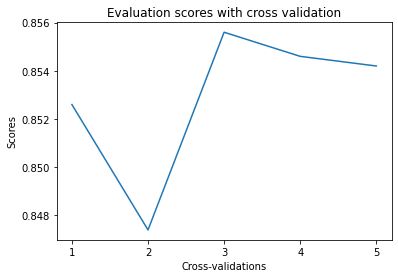

In [27]:
# PLOT - BAGGING with Decision Trees
import matplotlib.pyplot as plt
x = list(range(1, 6))

plt.plot(x, scores_bagged_trees)
plt.xticks(list(range(1, 6)))
plt.title("Evaluation scores with cross validation")
plt.xlabel("Cross-validations")
plt.ylabel("Scores")
plt.show()

In [ ]:
# PREDICT - BAGGING with Decision Trees

test_df = pd.read_csv(io.BytesIO(uploaded['test_final.csv']))
# Clean the testing data so that the transformer doesn't find
# values it hasn't seen before
# Holand-Netherlands is a unique example in the test_df
def clean_X_test(X_test):
  X_test['workclass'] = X_test['workclass'].replace('?','Private')
  X_test['occupation'] = X_test['occupation'].replace('?','Other-service')
  X_test['native.country'] = X_test['native.country'].replace('?','United-States')
  X_test['native.country'] = X_test['native.country'].replace('Holand-Netherlands','United-States')
  return X_test

bagged_trees.fit(X_train, y_train)

X_test = test_df.loc[:,test_df.columns != 'ID'].copy()
X_test = clean_X_test(X_test)
ids = test_df['ID']
y_test = []
# to predict on testing data
test_predictions = bagged_trees.predict(X_test)
# to predict on training data
predictions = bagged_trees.predict(X_train)

# SVMs

In [29]:
## BAGGING with SVM
from sklearn.svm import SVC
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
bagged_svms = make_pipeline(
    preprocessor,
    BaggingClassifier(
        base_estimator=SVC(),
        n_estimators=5, n_jobs=-1, random_state=0,
    )
)
scores_bagged_svms = cross_val_score(bagged_svms, X_train, y_train, verbose=5)

print(f"Bagged SVM classifier: "
      f"{scores_bagged_svms.mean():.3f} ± {scores_bagged_svms.std():.3f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.795) total time=  34.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s


[CV] END ................................ score: (test=0.790) total time=  33.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV] END ................................ score: (test=0.792) total time=  32.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV] END ................................ score: (test=0.797) total time=  33.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s


[CV] END ................................ score: (test=0.793) total time=  32.1s
Bagged SVM classifier: 0.793 ± 0.002


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished


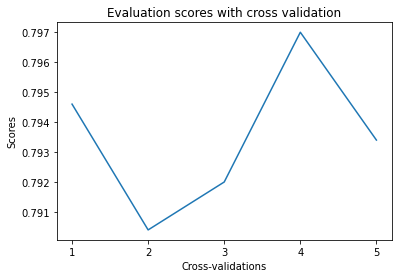

In [30]:
# PLOT - BAGGING with SVMs
import matplotlib.pyplot as plt
x = list(range(1, 6))

plt.plot(x, scores_bagged_svms)
plt.xticks(list(range(1, 6)))
plt.title("Evaluation scores with cross validation")
plt.xlabel("Cross-validations")
plt.ylabel("Scores")
plt.show()

In [ ]:
# PREDICT - BAGGING with SVMs

test_df = pd.read_csv(io.BytesIO(uploaded['test_final.csv']))
# Clean the testing data so that the transformer doesn't find
# values it hasn't seen before
# Holand-Netherlands is a unique example in the test_df
def clean_X_test(X_test):
  X_test['workclass'] = X_test['workclass'].replace('?','Private')
  X_test['occupation'] = X_test['occupation'].replace('?','Other-service')
  X_test['native.country'] = X_test['native.country'].replace('?','United-States')
  X_test['native.country'] = X_test['native.country'].replace('Holand-Netherlands','United-States')
  return X_test

bagged_svms.fit(X_train, y_train)

X_test = test_df.loc[:,test_df.columns != 'ID'].copy()
X_test = clean_X_test(X_test)
ids = test_df['ID']
y_test = []
# to predict on testing data
test_predictions = bagged_svms.predict(X_test)
# to predict on training data
predictions = bagged_svms.predict(X_train)

# Random Forest

In [31]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)
)
scores_random_forest = cross_val_score(random_forest, X_train, y_train, verbose=5)

print(f"Bagged SVM classifier: "
      f"{scores_random_forest.mean():.3f} ± {scores_random_forest.std():.3f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.863) total time=  11.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV] END ................................ score: (test=0.856) total time=  14.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.7s remaining:    0.0s


[CV] END ................................ score: (test=0.859) total time=  11.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.8s remaining:    0.0s


[CV] END ................................ score: (test=0.864) total time=  10.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.1s remaining:    0.0s


[CV] END ................................ score: (test=0.861) total time=  12.4s
Bagged SVM classifier: 0.861 ± 0.003


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.5s finished


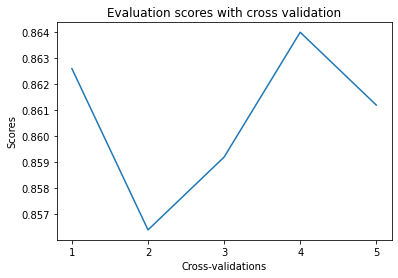

In [32]:
# PLOT - BAGGING with Random Forest
import matplotlib.pyplot as plt
x = list(range(1, 6))

plt.plot(x, scores_random_forest)
plt.xticks(list(range(1, 6)))
plt.title("Evaluation scores with cross validation")
plt.xlabel("Cross-validations")
plt.ylabel("Scores")
plt.show()

In [ ]:
# PREDICT - BAGGING with Random Forest

test_df = pd.read_csv(io.BytesIO(uploaded['test_final.csv']))
# Clean the testing data so that the transformer doesn't find
# values it hasn't seen before
# Holand-Netherlands is a unique example in the test_df
def clean_X_test(X_test):
  X_test['workclass'] = X_test['workclass'].replace('?','Private')
  X_test['occupation'] = X_test['occupation'].replace('?','Other-service')
  X_test['native.country'] = X_test['native.country'].replace('?','United-States')
  X_test['native.country'] = X_test['native.country'].replace('Holand-Netherlands','United-States')
  return X_test

random_forest.fit(X_train, y_train)

X_test = test_df.loc[:,test_df.columns != 'ID'].copy()
X_test = clean_X_test(X_test)
ids = test_df['ID']
y_test = []
# to predict on testing data
test_predictions = random_forest.predict(X_test)
# to predict on training data
predictions = random_forest.predict(X_train)

# Adaboost

In [332]:
## ADABOOST
from sklearn.ensemble import AdaBoostClassifier
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
adaboost = make_pipeline(
    preprocessor,
    AdaBoostClassifier(
        n_estimators=1000, random_state=1,
    )
)
scores_adaboost = cross_val_score(adaboost, X_train, y_train, verbose=5)

print(f"Adaboost classifier: "
      f"{scores_adaboost.mean():.3f} ± {scores_adaboost.std():.3f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.875) total time=  19.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s


[CV] END ................................ score: (test=0.866) total time=  17.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.9s remaining:    0.0s


[CV] END ................................ score: (test=0.874) total time=  17.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   54.5s remaining:    0.0s


[CV] END ................................ score: (test=0.878) total time=  17.4s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV] END ................................ score: (test=0.870) total time=  17.9s
Adaboost classifier: 0.873 ± 0.004


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


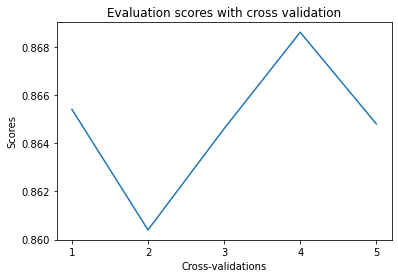

In [36]:
# PLOT - Adaboost
import matplotlib.pyplot as plt
x = list(range(1, 6))

plt.plot(x, scores_adaboost)
plt.xticks(list(range(1, 6)))
plt.title("Evaluation scores with cross validation")
plt.xlabel("Cross-validations")
plt.ylabel("Scores")
plt.show()

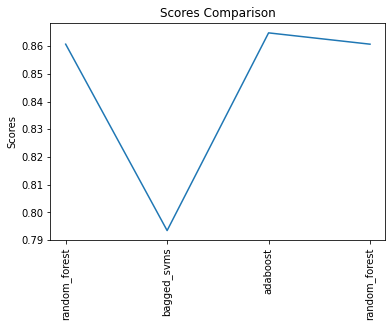

In [42]:
# PLOT - Comparison
import matplotlib.pyplot as plt
x = list(range(1, 5))
s = [scores_random_forest.mean(), scores_bagged_svms.mean(),
             scores_adaboost.mean(), scores_random_forest.mean()]
plt.plot(x, s)
plt.xticks(x,["random_forest", "bagged_svms",
             "adaboost", "random_forest"], rotation="vertical")
plt.title("Scores Comparison")
plt.ylabel("Scores")
plt.show()

In [333]:
# PREDICT - BAGGING with Adaboost

test_df = pd.read_csv(io.BytesIO(uploaded['test_final.csv']))
# Clean the testing data so that the transformer doesn't find
# values it hasn't seen before
# Holand-Netherlands is a unique example in the test_df
def clean_X_test(X_test):
  X_test['workclass'] = X_test['workclass'].replace('?','Private')
  X_test['occupation'] = X_test['occupation'].replace('?','Other-service')
  X_test['native.country'] = X_test['native.country'].replace('?','United-States')
  X_test['native.country'] = X_test['native.country'].replace('Holand-Netherlands','United-States')
  return X_test

adaboost.fit(X_train, y_train)

X_test = test_df.loc[:,test_df.columns != 'ID'].copy()
X_test = clean_X_test(X_test)
ids = test_df['ID']
y_test = []
# to predict on testing data
test_predictions = adaboost.predict(X_test)
# to predict on training data
predictions = adaboost.predict(X_train)

# Further process the data

In [246]:
# checkpoint to debug data processing
X_train = X.loc[:,X.columns != 'income>50K']
y_train = X['income>50K']

In [ ]:
# age column
# X_train.age.plot.hist()
# X_train["age"] = np.where((X_train["age"] <= 45) & (X_train["age"] > 0), -1, X_train["age"])
# X_train["age"] = np.where((X_train["age"] <= 65) & (X_train["age"] > 45), -2, X_train["age"])
# X_train["age"] = np.where((X_train["age"] > 65), -3, X_train["age"])
# X_train["age"] = X_train["age"].replace(-1,"0to45")
# X_train["age"] = X_train["age"].replace(-2,"46to65")
# X_train["age"] = X_train["age"].replace(-3,"66above")
# X_train.age

In [ ]:
# X_train["workclass"] = X_train["workclass"].replace(["Self-emp-inc","Federal-gov",
#                                                      "Without-pay","Never-worked"],"other")
# X_train.workclass.value_counts()

In [ ]:
# fnlwgt column
# X_train.fnlwgt.plot.hist(bins=50)
# X_train["fnlwgt"] = np.where((X_train["fnlwgt"] <= 100000) & (X_train["fnlwgt"] > 0), -1, X_train["fnlwgt"])
# X_train["fnlwgt"] = np.where((X_train["fnlwgt"] <= 220000) & (X_train["fnlwgt"] > 100000), -2, X_train["fnlwgt"])
# X_train["fnlwgt"] = np.where((X_train["fnlwgt"] > 220000), -3, X_train["fnlwgt"])
# X_train["fnlwgt"] = X_train["fnlwgt"].replace(-1,"0to100K")
# X_train["fnlwgt"] = X_train["fnlwgt"].replace(-2,"100to220K")
# X_train["fnlwgt"] = X_train["fnlwgt"].replace(-3,"220Kabove")

In [ ]:
# capital.gain column
# X_train["capital.gain"].plot.hist(bins=50)
# X_train["capital.gain"].value_counts()[0:20]
# X_train["capital.gain"] = np.where((X_train["capital.gain"] == 0), -1, X_train["capital.gain"])
# X_train["capital.gain"] = np.where((X_train["capital.gain"] > 0), -2, X_train["capital.gain"])
# X_train["capital.gain"] = X_train["capital.gain"].replace(-1,"zero")
# X_train["capital.gain"] = X_train["capital.gain"].replace(-2,"more_than_zero")

In [ ]:
# capital.loss column
# X_train["capital.loss"].plot.hist(bins=50)
# X_train["capital.loss"].value_counts()[0:20]
# X_train["capital.loss"] = np.where((X_train["capital.loss"] == 0), -1, X_train["capital.loss"])
# X_train["capital.loss"] = np.where((X_train["capital.loss"] > 0), -2, X_train["capital.loss"])
# X_train["capital.loss"] = X_train["capital.loss"].replace(-1,"zero")
# X_train["capital.loss"] = X_train["capital.loss"].replace(-2,"more_than_zero")

In [ ]:
# hours.per.week column
# X_train["hours.per.week"].plot.hist(bins=50)
# X_train["hours.per.week"].value_counts()
# X_train["hours.per.week"] = np.where((X_train["hours.per.week"] < 40), -1, X_train["hours.per.week"])
# X_train["hours.per.week"] = np.where((X_train["hours.per.week"] == 40), -2, X_train["hours.per.week"])
# X_train["hours.per.week"] = np.where((X_train["hours.per.week"] > 40), -3, X_train["hours.per.week"])
# X_train["hours.per.week"] = X_train["hours.per.week"].replace(-1,"-fourty")
# X_train["hours.per.week"] = X_train["hours.per.week"].replace(-2,"fourty")
# X_train["hours.per.week"] = X_train["hours.per.week"].replace(-3,"+fourty")

# Naive Bayes

In [252]:
from sklearn.naive_bayes import GaussianNB
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
gnb = make_pipeline(
    preprocessor,
    GaussianNB()
)

preds = gnb.fit(X_train, y_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_gaussian = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_gaussian)

Number of mislabeled points out of a total 25000 points : 5099
% 79.604


In [253]:
from sklearn.naive_bayes import  MultinomialNB
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
gnb = make_pipeline(
    preprocessor,
    MultinomialNB()
)

preds = gnb.fit(X_train, y_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_multinominal = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_multinominal)

Number of mislabeled points out of a total 25000 points : 5408
% 78.368


In [254]:
from sklearn.naive_bayes import  ComplementNB
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
gnb = make_pipeline(
    preprocessor,
    ComplementNB()
)

preds = gnb.fit(X_train, y_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_complement = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_complement)

Number of mislabeled points out of a total 25000 points : 5408
% 78.368


In [255]:
from sklearn.naive_bayes import  BernoulliNB
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
gnb = make_pipeline(
    preprocessor,
    BernoulliNB()
)

preds = gnb.fit(X_train, y_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_bernoulli = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_bernoulli)

Number of mislabeled points out of a total 25000 points : 6832
% 72.672


In [256]:
from sklearn.naive_bayes import  CategoricalNB
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
gnb = make_pipeline(
    preprocessor,
    CategoricalNB()
)

preds = gnb.fit(X_train, y_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_categorical = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_categorical)

Number of mislabeled points out of a total 25000 points : 2724
% 89.104


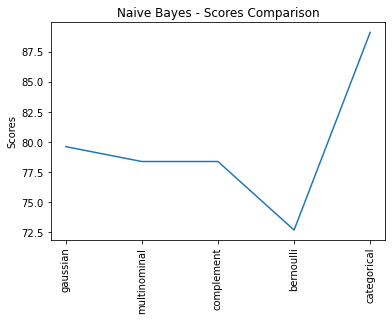

In [257]:
# PLOT - Comparison between NAIVE BAYES
import matplotlib.pyplot as plt
x = list(range(1, 6))
s = [score_gaussian, score_multinominal, score_complement, score_bernoulli, score_categorical]
plt.plot(x, s)
plt.xticks(x,["gaussian", "multinominal",
             "complement", "bernoulli",
              "categorical"], rotation="vertical")
plt.title("Naive Bayes - Scores Comparison")
plt.ylabel("Scores")
plt.show()

In [ ]:
## ADABOOST
from sklearn.ensemble import AdaBoostClassifier
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
adaboost = make_pipeline(
    preprocessor,
    AdaBoostClassifier(
        n_estimators=100, random_state=0,
    )
)
scores_adaboost = cross_val_score(adaboost, X_train, y_train, verbose=5)

print(f"Adaboost classifier: "
      f"{scores_adaboost.mean():.3f} ± {scores_adaboost.std():.3f}")

# Perceptron

In [271]:
from sklearn.linear_model import Perceptron
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
p = make_pipeline(
    preprocessor,
    Perceptron(random_state=42, max_iter=1000, tol=0.0001, penalty="l2")
)

preds = p.fit(X_train, y_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_perceptron = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_perceptron)

Number of mislabeled points out of a total 25000 points : 5135
% 79.46000000000001


# KNN

k=1 score=99.992
k=2 score=87.056
k=3 score=86.488
k=4 score=83.47200000000001
k=5 score=83.388
k=6 score=82.336
k=7 score=82.188
k=8 score=81.64
k=9 score=81.496
k=10 score=81.136
k=11 score=81.096
k=12 score=80.80799999999999
k=13 score=80.88
k=14 score=80.69200000000001


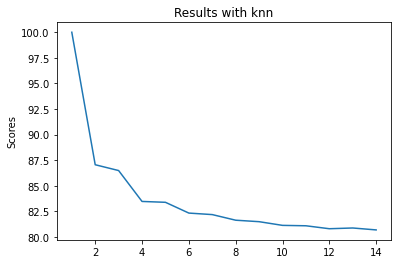

In [281]:
from sklearn.neighbors import KNeighborsClassifier
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
results = []
for i in range(1,15):
  knn = make_pipeline(
      preprocessor,
      KNeighborsClassifier(n_neighbors=i)
  )

  preds = knn.fit(X_train, y_train).predict(X_train)


  
  score_knn = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])

  results.append(score_knn)

for k, score in enumerate(results):
  print(f"k={k+1} score={score}")
plt.plot(list(range(1,15)), results)
plt.title("Results with knn")
plt.ylabel("Scores")
plt.show()

In [278]:
# PREDICT - KNN
knn = make_pipeline(
      preprocessor,
      KNeighborsClassifier(n_neighbors=4)
  )

test_df = pd.read_csv(io.BytesIO(uploaded['test_final.csv']))
# Clean the testing data so that the transformer doesn't find
# values it hasn't seen before
# Holand-Netherlands is a unique example in the test_df
def clean_X_test(X_test):
  X_test['workclass'] = X_test['workclass'].replace('?','Private')
  X_test['occupation'] = X_test['occupation'].replace('?','Other-service')
  X_test['native.country'] = X_test['native.country'].replace('?','United-States')
  X_test['native.country'] = X_test['native.country'].replace('Holand-Netherlands','United-States')
  return X_test

knn.fit(X_train, y_train)

X_test = test_df.loc[:,test_df.columns != 'ID'].copy()
X_test = clean_X_test(X_test)
ids = test_df['ID']
y_test = []
# to predict on testing data
test_predictions = knn.predict(X_test)

# Neural Net

In [320]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
categorical_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

# checkpoint to debug data processing
X_train = X.loc[:,X.columns != 'income>50K']
y_train = X['income>50K']

nn = MLPClassifier(solver='sgd', alpha=1e-4,
                  hidden_layer_sizes=(14, 512, 256, 2), random_state=42,
                  learning_rate="adaptive", activation="relu",
                  max_iter=500)
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
preds = nn.fit(X_train).predict(X_train)


print("Number of mislabeled points out of a total %d points : %d"
          % (X_train.shape[0], (y_train != preds).sum()))
score_nn = (100 - (y_train != preds).sum() * 100 / X_train.shape[0])
print("%",score_nn)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of mislabeled points out of a total 25000 points : 3195
% 87.22


In [325]:
# checkpoint to debug data processing
X_train = X.loc[:,X.columns != 'income>50K']
y_train = X['income>50K']

In [327]:
# Predict NN
test_df = pd.read_csv(io.BytesIO(uploaded['test_final.csv']))
# Clean the testing data so that the transformer doesn't find
# values it hasn't seen before
# Holand-Netherlands is a unique example in the test_df
def clean_X_test(X_test):
  X_test['workclass'] = X_test['workclass'].replace('?','Private')
  X_test['occupation'] = X_test['occupation'].replace('?','Other-service')
  X_test['native.country'] = X_test['native.country'].replace('?','United-States')
  X_test['native.country'] = X_test['native.country'].replace('Holand-Netherlands','United-States')
  return X_test
X_test = test_df.loc[:,test_df.columns != 'ID'].copy()
X_test = clean_X_test(X_test)
ids = test_df['ID']
y_test = []

preprocessor2 = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)
# to predict on testing data
preprocessor2.fit(X_test)
X_test = preprocessor.transform(X_test)
scaler2 = StandardScaler()
scaler2.fit(X_test)
X_test = scaler.transform(X_test)
test_predictions = nn.predict(X_test)
#test_predictions = nn.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [334]:
# download csv
d = {'ID': ids.tolist(), 'Prediction': test_predictions}
resultDF = pd.DataFrame(d)

from google.colab import files
resultDF.to_csv('predictions.csv', index=None) 
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>